# FW functions


In [23]:
import sys
# Second append the folder path in name-file.py
sys.path.insert(0, '/home/ejafari/alignment/Git/src/')
from utils import *
from AIscEA import *
from evals import *
from rmCls import *
from similarity import *
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [14]:
from importlib import reload  
import similarity


similarity = reload(similarity)

In [15]:
# from importlib import reload  
# import AIscEA


# AIscEA = reload(AIscEA)

# RNA and ATAC

AnnData object with n_obs × n_vars = 33160 × 10309
AnnData object with n_obs × n_vars = 10309 × 33160
10309
33160
AnnData object with n_obs × n_vars = 10309 × 25403
    obs: 'n_genes'
    var: 'n_cells'
10309
25403
View of AnnData object with n_obs × n_vars = 10309 × 25403
    obs: 'n_genes'
    var: 'n_cells'


Trying to set attribute `.obs` of view, copying.


View of AnnData object with n_obs × n_vars = 10309 × 4301
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
         Falling back to preprocessing with `sc.pp.pca` and default params.


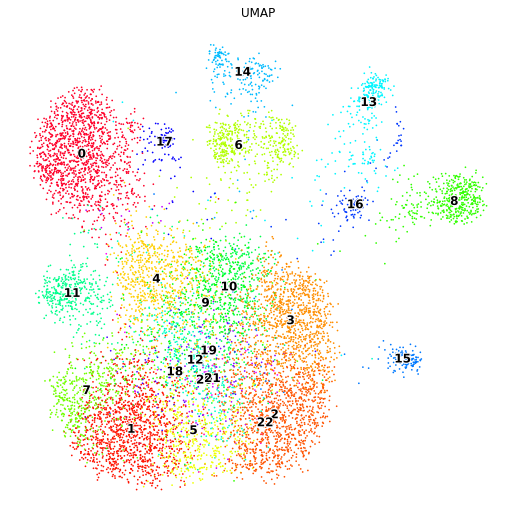

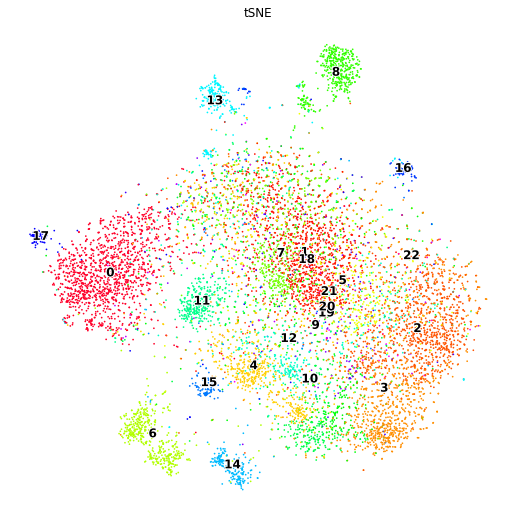

0 : 1376
1 : 1255
2 : 1120
3 : 1066
4 : 710
5 : 530
6 : 530
7 : 502
8 : 461
9 : 425
10 : 420
11 : 411
12 : 396
13 : 284
14 : 209
15 : 141
16 : 118
17 : 101
18 : 74
19 : 72
20 : 71
21 : 33
22 : 4


In [16]:
############################ High_var = True ######################################
input_dir = "/home/ejafari/alignment/downstream/data/SNAREseq/Mouse/10k/"
scRNAseq_adrs = input_dir + 'scRNAseq.csv'
# Find marker genes of scRNAseq data

markers_rna, rna = scRNAseq_clustering_original(scRNAseq_adrs, filtering=True, resl=2.23, highly_var=True, tr=True)


AnnData object with n_obs × n_vars = 14 × 10309
AnnData object with n_obs × n_vars = 10309 × 14


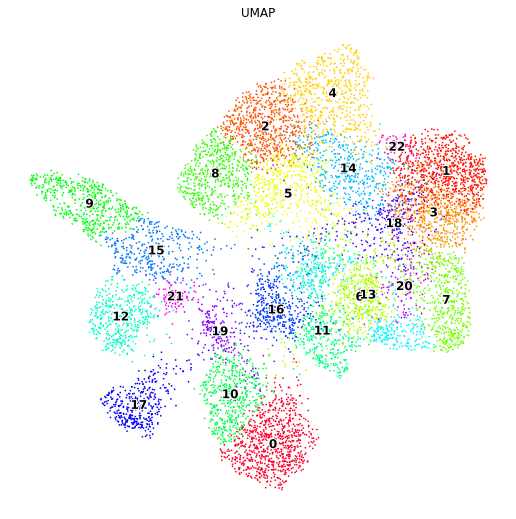

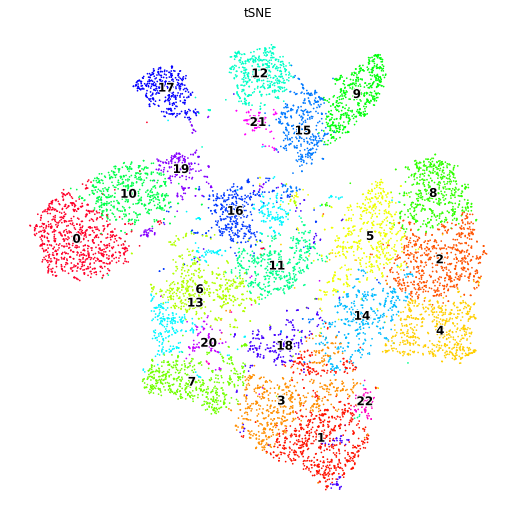

0 : 812
1 : 761
2 : 671
3 : 612
4 : 579
5 : 563
6 : 541
7 : 535
8 : 531
9 : 509
10 : 506
11 : 446
12 : 439
13 : 414
14 : 411
15 : 407
16 : 400
17 : 362
18 : 305
19 : 235
20 : 100
21 : 96
22 : 74


In [17]:
# Find clusters of low dimensional cisTopic result for scATACseq
# This is the same as when we use closest downstream genes 
input_dir = "/home/ejafari/alignment/downstream/data/SNAREseq/Mouse/10k/"
# 1.9 > 21
atac = clustering(input_dir + 'cisTopic_topics.tsv', transpose=True, resl=2)


############################ scATAC ######################################
# 1) Put cisTopic clusters and embedding values on the original data and 2) find marker genes and their logFC
# Ref: http://localhost:8080/notebooks/alignment/bedtools_intersect/pipeline_preprocessing_intersect.ipynb
input_dir = "/home/ejafari/alignment/downstream/data/SNAREseq/Mouse/10k/"
f_original = 'pred_intersect_genes.csv'
markers_atac, atac_cis_on_org = process_cisTopic_on_orig(atac, f_original, input_dir, save=False, transpose=True)


atac_cis_on_org.obs.index = [ind[1:] for ind in atac_cis_on_org.obs.index]
atac.obs.index = [ind[1:] for ind in atac.obs.index]



# Cell-type alignment

## Min_cells: 200

In [18]:
rna, atac_cis_on_org,  markers_rna, markers_atac = rm_tiny_cluster(rna, atac_cis_on_org,markers_rna, markers_atac, min_cells=200, rm_correspondence=False)

RNA: 19
RNA: 20
RNA: 18
RNA: 21
RNA: 17
RNA: 16
RNA: 15
RNA: 22
ATAC: 20
ATAC: 21
ATAC: 22


In [19]:
col_ind, rna, atac_cis_on_org = extract_mapped_clusters(rna, markers_rna, atac_cis_on_org, markers_atac, p_val_count=6)

0.0
0.0 [10  2  1 18  6 14 12  8  9  7  3 17  5 15 19]
[10  2  1 18  6 14 12  8  9  7  3 17  5 15 19]
P-value:  {(12, 5): 0.0, (9, 7): 0.0, (10, 3): 0.0, (5, 14): 0.0, (4, 6): 0.0, (11, 17): 0.0, (7, 8): 0.0, (2, 1): 0.0010000000000000009, (14, 19): 0.0, (1, 2): 0.0, (3, 18): 0.0, (0, 10): 0.0, (6, 12): 0.0, (13, 15): 0.0, (8, 9): 0.0}
$$$$$$$ 
 
0.1
0.1 [10  8  1  3  0  5 12  2  9  7 18 17  4 15 19]
[10  8  1  3  0  5 12  2  9  7 18 17  4 15 19]
P-value:  {(12, 4): 0.0, (10, 18): 0.0, (9, 7): 0.0, (5, 5): 0.0, (4, 0): 0.0, (11, 17): 0.0, (14, 19): 0.0, (7, 2): 0.0, (2, 1): 0.0, (1, 8): 0.0, (3, 3): 0.0010000000000000009, (0, 10): 0.0, (6, 12): 0.0, (13, 15): 0.0, (8, 9): 0.06599999999999995}
$$$$$$$ 
 
0.2
0.2 [ 0  8  1  3 10 14 12  2  9  7  6 17 18 15 19]
[ 0  8  1  3 10 14 12  2  9  7  6 17 18 15 19]
P-value:  {(10, 6): 0.0, (5, 14): 0.0, (12, 18): 0.0, (9, 7): 0.0, (14, 19): 0.0, (4, 10): 0.0, (11, 17): 0.0, (3, 3): 0.0, (2, 1): 0.0, (7, 2): 0.0, (1, 8): 0.0, (0, 0): 0.0, (13, 15):

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
5,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0



Mapped clusters between Domain1 and Domain2:  {0: 0, 1: 2, 2: 1, 6: 12, 7: 8, 8: 9, 10: 6}

Removing non-significant clusters.


In [20]:
print(rna.shape, atac_cis_on_org.shape)


# Number of shared cells
len(set(rna.obs.index) & set(atac_cis_on_org.obs.index))

(5664, 4301) (4264, 21446)


3250

### Jaccard cluster scpre

In [21]:
# Double check the true mappings using cell labels
import pickle
import pandas as pd
df_cells_common = pd.DataFrame(columns=['overlap', 'union', 'jacc', 'overlap/min'])
out_dir = "/home/ejafari/alignment/downstream/notebooks/FW_cluster_cell_names/Mus_10k/"
cls_overlap_dict = dict()

for cls_rna in sorted(set(rna.obs['leiden'])):
    cls_atac = str(col_ind[int(cls_rna)])
    cells_atac  = atac_cis_on_org.obs[atac_cis_on_org.obs['leiden'] == str(cls_atac)].index
    cells_rna = rna.obs[rna.obs['leiden'] == str(cls_rna)].index
    overlap = set(cells_atac) & set(cells_rna)
    n_overlapping = len(overlap)
    cls_overlap_dict[cls_rna + "_" + cls_atac] = overlap
    

        
    n_union = len(set(cells_rna).union(cells_atac))
    jacc = n_overlapping/n_union
    overlap_min = n_overlapping/min(len(cells_rna), len(cells_atac))
    df_cells_common.loc['r_' + str(cls_rna) + '_a_' + str(cls_atac)] = [n_overlapping, n_union, jacc, overlap_min]

    print(cls_rna, cls_atac, len(cells_rna), len(cells_atac), n_union, n_overlapping, jacc) 
    
    # Save overlapping cell names in mapped clusters
with open(out_dir + 'overlap_mapped_clusters.pickle', 'wb') as handle:
    pickle.dump(cls_overlap_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
   
overlap_coef = dict()
for k, v in dict(df_cells_common['overlap/min']).items():
    overlap_coef[k.split("_")[1] + "_" + k.split("_")[-1]] = round(v, 3)    
print(overlap_coef)


df_cells_common


0 0 1376 812 1431 757 0.5290006988120196
1 2 1255 671 1482 444 0.29959514170040485
10 6 420 541 783 178 0.227330779054917
2 1 1120 761 1344 537 0.39955357142857145
6 12 530 439 559 410 0.7334525939177102
7 8 502 531 777 256 0.32947232947232946
8 9 461 509 662 308 0.4652567975830816
{'0_0': 0.932, '1_2': 0.662, '10_6': 0.424, '2_1': 0.706, '6_12': 0.934, '7_8': 0.51, '8_9': 0.668}


,overlap,union,jacc,overlap/min
r_0_a_0,757.0,1431.0,0.529001,0.932266
r_1_a_2,444.0,1482.0,0.299595,0.661699
r_10_a_6,178.0,783.0,0.227331,0.423810
r_2_a_1,537.0,1344.0,0.399554,0.705650
r_6_a_12,410.0,559.0,0.733453,0.933941
r_7_a_8,256.0,777.0,0.329472,0.509960
r_8_a_9,308.0,662.0,0.465257,0.668113


# Cell-cell alignment in AIscEA

In [24]:
aligns_dict = AIscEA(col_ind, rna, markers_rna, atac_cis_on_org, markers_atac)

0
668 262
137210 21446
0 0
After combining multi-cells:  (812, 135)
1 2
After combining multi-cells:  (671, 102)
2 1
After combining multi-cells:  (761, 109)
6 12
After combining multi-cells:  (439, 133)
7 8
After combining multi-cells:  (502, 19817)
8 9
After combining multi-cells:  (461, 20703)
10 6
After combining multi-cells:  (420, 19226)
------------------------after RNA-ATAC similarity----------------------
------------------------before FW----------------------
Inside calc_foscttm: 
757
Check:  1376 812 0
Inside calc_foscttm, adata_atac_k: 
1376 812 785 0.07681215983515748 769 0.16405877285335746 0.12043546634425747
Inside calc_foscttm: 
444
Check:  1255 671 2
Inside calc_foscttm, adata_atac_k: 
1255 671 599 0.12329661213565372 544 0.1901861039846083 0.156741358060131
Inside calc_foscttm: 
537
Check:  1120 761 1
Inside calc_foscttm, adata_atac_k: 
1120 761 567 0.07690036596976382 559 0.1504866208544361 0.11369349341209996
Inside calc_foscttm: 
410
Check:  530 439 12
Inside calc